# Tokenizers (PyTorch)
必須將文字轉換為模型可以處理的資料。因為模型只能處理數字，因此分詞器需要將的文字輸入轉換為數字資料。

### 以單字(詞)為基礎的分詞器
第一個tokenizers是基於詞的。通常很容易設定和使用，只需一些規則，並且通常會產生不錯的結果。例如，在下圖中，目標是將原始文字分割成單字並找到每個單字的數字表示：

目標是找到最有意義的表示法——即對模型最有意義的表示——如果可能的話，找到最小量的表示
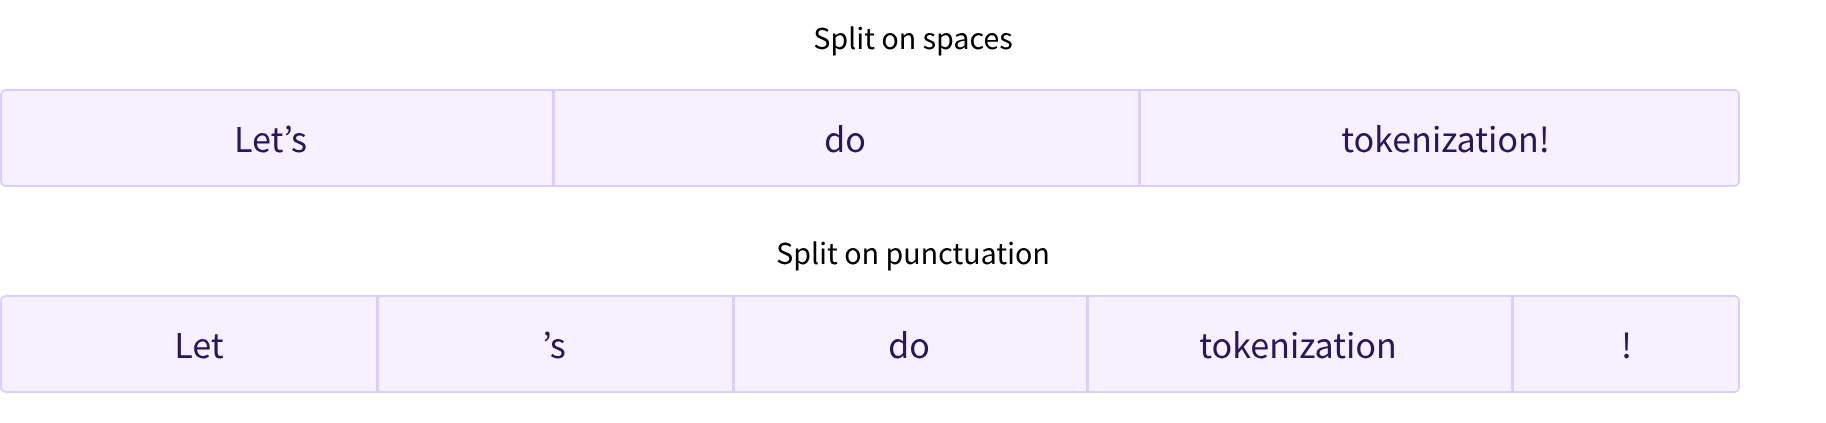

### 字元tokenizer的問題
表示是基於字元而不是單詞，直觀上它的意義不大：每個字元本身並沒有多大意義，根據語言的不同而有所不同；例如，在中文中，每個字元比拉丁語言中的字元攜帶更多資訊。


另一件需要考慮的事情是，我們的模型最終會處理大量的標記：雖然一個單字在基於單字的標記產生器中只是一個token，變成字元時，但它可以輕鬆地變成 10 個或更多token

安裝套件

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


列印出被分詞後的句子(雖然還是文字)，透過應用 Python`split()`函數，使用空格將文字標記為單字

In [ ]:
tokenized_text = "Jim Henson was a puppeteer".split()
print(tokenized_text)

['Jim', 'Henson', 'was', 'a', 'puppeteer']


另外還有一些單字tokenizer的變體，具有額外的標點符號規則。使用這種tokenizers，最終可以獲得一些相當大的“詞彙表”，其中詞彙表是由我們語料庫中擁有的獨立token的總數定義的。每個單字都會分配一個 ID，從 0 開始，一直到詞彙表的大小。該模型使用這些 ID 來識別每個單字

用基於單字的標記器完全覆蓋一種語言，我們需要為該語言中的每個單字都有一個標識符，這將產生大量的標記。例如，英語中有超過 500,000 個單詞，因此要建立從每個單字到輸入 ID 的映射，

“dog”這樣的詞與“dogs”這樣的詞的表示方式不同，模型最初無法知道“dog”和“dogs”是相似的：它會將這兩個詞識別為不相關。這同樣適用於其他相似的單詞，例如“run”和“running”，模型最初不會將其視為相似

需要一個自訂tokenizer來表示不在詞彙表中的單字。稱為“未知”token，通常表示為`[unk]`。如果到tokenizer正在產生大量此類token，通常是一個壞兆頭，因為它無法檢索單字的合理表示，並且會在此過程中丟失資訊。製作詞彙表時的目標是讓tokenizer將盡可能少的單字分詞到未知的分詞中。

### 以字元為基礎的tokenizer
兩個主要好處：

* 詞彙量小得多。
* 詞彙表外（未知）標記要少得多，因為每個單字都可以由字元建構

但也出現關於空格和標點符號的問題

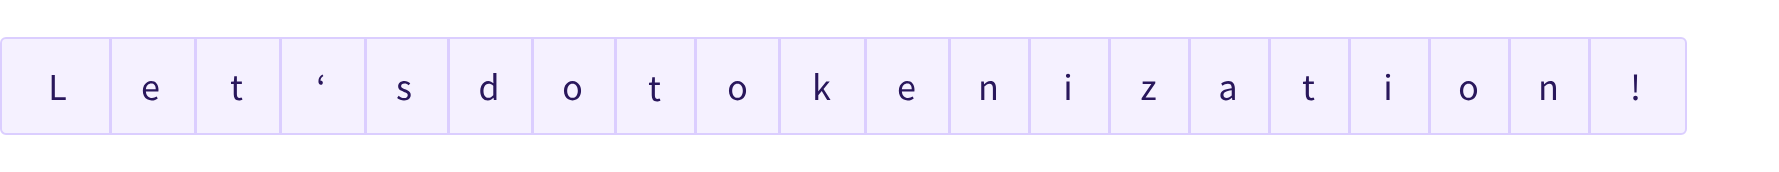

### 以subword為基礎的分詞
頻繁使用的詞不應該被分割成更小的子詞，但罕見的詞應該被分解成有意義的子詞。例如，“annoyingly”可能被認為是一個罕見的詞，可以分解為“annoying”和“ly”。這些都可能更頻繁地作為獨立子詞出現，而同時“annoyingly”的含義由“annoying”和“ly”的複合含義保留。

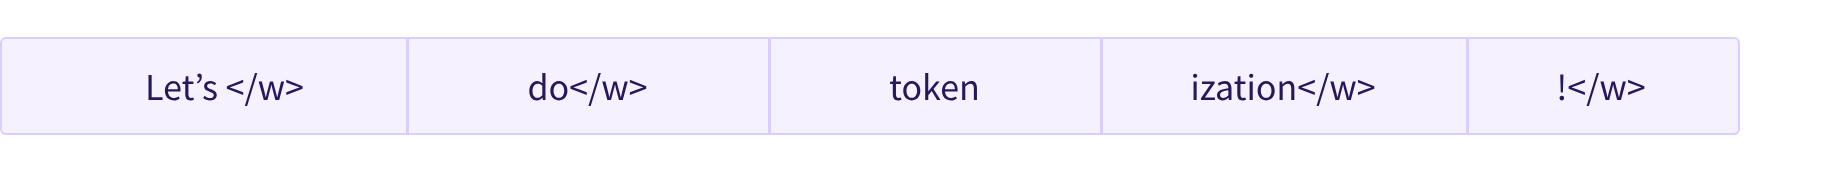

這些子詞最終提供了很多語義含義：例如“tokenization”被拆分為“token”和“ization”，兩個標記具有語義意義，同時節省空間（只需要兩個標記）來表示一個長單字）。這使我們能夠用較小的詞彙量獲得相對較好的覆蓋率，並且幾乎沒有未知的標記。這種方法在諸如土耳其語之類的語言中特別有用，在這種語言中，您可以透過將子字串在一起來形成（幾乎）任意長的複雜單字。

常見的方法

* Byte-level BPE, as used in GPT-2
* WordPiece, as used in BERT
* SentencePiece or Unigram, as used in several multilingual models

### Tokenizer載入
載入和保存分詞器與模型一樣簡單。實際上，它是基於相同的兩種方法：`from_pretrained()`和`save_pretrained()`。這些方法將載入或保存分詞器使用的演算法（有點像模型的架構）及其詞彙表（有點像模型的權重）。

載入使用與 BERT 相同的檢查點訓練的 BERT 分詞器的方式與載入模型相同，只是我們使用了以下`BertTokenizer`類別：

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

可以儲存

In [ ]:
tokenizer.save_pretrained("./bert_tokenizer")

('./bert_tokenizer/tokenizer_config.json',
 './bert_tokenizer/special_tokens_map.json',
 './bert_tokenizer/vocab.txt',
 './bert_tokenizer/added_tokens.json')

使用`AutoTokenizer`類別

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [ ]:
tokenizer("Using a Transformer network is simple")

{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

將文字轉換為數字稱為encode。編碼分兩步驟完成：tokenize，然後轉換為輸入 ID。

第一步是將文字分割成單字（或單字的一部分、標點符號等），通常稱為標記。有多個規則可以管理這個過程，這就是為什麼我們需要使用模型名稱實例化標記器，以確保我們使用與**預訓練模型時使用的相同規則**。

第二步是將這些標記轉換為數字，這樣我們就可以用它們建立一個張量並將它們輸入到模型中。為此，分詞器有一個詞彙表，這是我們使用該from_pretrained()方法實例化它時下載的部分。同樣，我們需要使用預訓練模型時使用的相同詞彙。

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"
tokens = tokenizer.tokenize(sequence)

print(tokens)

['Using', 'a', 'transform', '##er', 'network', 'is', 'simple']

In [ ]:
ids = tokenizer.convert_tokens_to_ids(tokens)

print(ids)

[7993, 170, 11303, 1200, 2443, 1110, 3014]

### 解碼
解碼是相反的：從詞彙索引中，我們想要得到一個字串。這可以透過decode()以下方法完成：

In [ ]:
decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])
print(decoded_string)

'Using a Transformer network is simple'

`decode`方法不僅將索引轉換回標記，而且還將屬於相同單字的標記**組合**在一起以產生可讀的句子。當我們使用預測新文字的模型（從提示產生的文字，或用於翻譯或摘要等序列到序列問題）時非常有用。

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-chinese")

sequence = "明新科技大學的大型語言處理課程"
tokens = tokenizer.tokenize(sequence)

print(tokens)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

['明', '新', '科', '技', '大', '學', '的', '大', '型', '語', '言', '處', '理', '課', '程']


In [8]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("taide/TAIDE-LX-7B-Chat")

sequence = "明新科技大學的大型語言處理課程"
tokens = tokenizer.tokenize(sequence)

print(tokens)

tokenizer_config.json:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/813k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


['▁', '明', '新', '科技', '大學的', '大型', '語言', '處理', '課程']
